In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
df_1 = pd.read_pickle(r"C:\Users\ms207\Desktop\CF\4\19012022 Instacart Basket Analysis\02 Data\Prepared data\df_merge_4_9.pkl")

In [56]:
df_2 = pd.read_pickle(r"C:\Users\ms207\Desktop\CF\4\19012022 Instacart Basket Analysis\02 Data\Prepared data\merged_final.pkl")

In [4]:
df_1.columns

Index(['Unnamed', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge_x', 'max_order',
       'loyalty_flag', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'department', '_merge_y', 'spending',
       'spending_flag', 'frequency', 'frequency_flag', 'surname', 'gender',
       'state', 'age', 'date_joined', 'number_dependants', 'fam_status',
       'income'],
      dtype='object')

In [57]:
df_2.columns

Index(['Unnamed', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge_x', 'max_order',
       'loyalty_flag', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'department', '_merge_y', 'spending',
       'spending_flag', 'frequency', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'number_dependants', 'fam_status', 'income',
       'region', 'exclusion_flag', 'age_group', 'income_range',
       'parental_status', 'weekday', 'part_of_day', 'selling_performance',
       'price_range'],
      dtype='object')

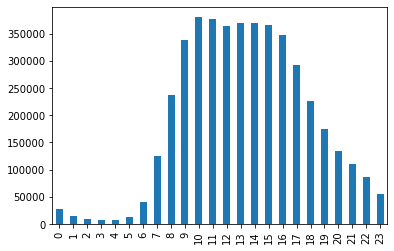

In [5]:
bar_busiest_hour = df_1['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [6]:
path = r"C:\Users\ms207\Desktop\CF\4\19012022 Instacart Basket Analysis\04 Analysis\Visualizations"

In [7]:
bar_busiest_hour.figure.savefig(os.path.join(path,'bar_busiest_hour.png'))

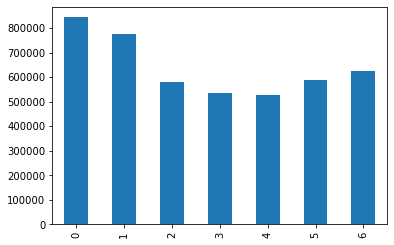

In [8]:
bar_busiest_day_of_week = df_1['order_dow'].value_counts().sort_index().plot.bar()

In [9]:
bar_busiest_day_of_week.figure.savefig(os.path.join(path, 'bar_busiest_day_of_week.png'))

In [10]:
# Mean price per hour
prices_hour = df_1.groupby('order_hour_of_day').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

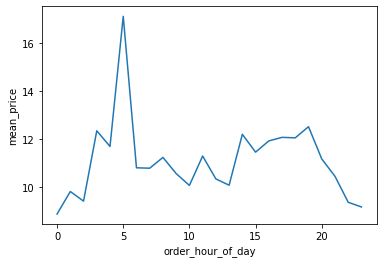

In [11]:
# Create a line chart of mean prices per hour of the day 
mean_price_line_chart_hour = prices_hour.plot.line(legend = False)
plt.ylabel('mean_price')

In [12]:
mean_price_line_chart_hour.figure.savefig(os.path.join(path, 'mean_price_line_chart_hour.png'))

In [13]:
df_1.loc[df_1['prices'] > 15, "price_range"] = "High"

In [14]:
df_1.loc[(df_1["prices"] > 7) & (df_1["prices"] <= 15), "price_range"] = "Mid"

In [15]:
df_1.loc[df_1["prices"] <= 7, "price_range"] = "Low"

In [16]:
df_1['price_range'].value_counts(dropna = False)

Mid     2294348
Low     2121563
High      56334
Name: price_range, dtype: int64

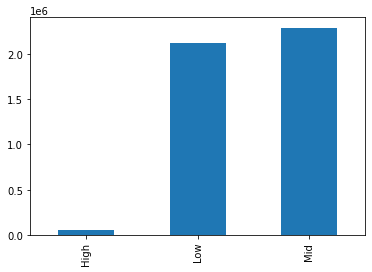

In [17]:
product_price_ranges = df_1['price_range'].value_counts().sort_index().plot.bar()

In [18]:
product_price_ranges.figure.savefig(os.path.join(path, 'product_price_ranges.png'))

In [19]:
df_freq = df_1[['frequency', 'department']]

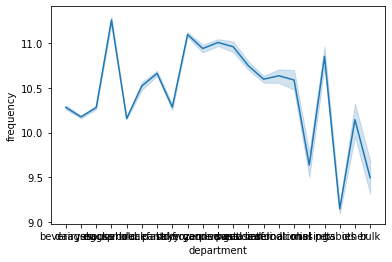

In [20]:
line_freq = sns.lineplot(data = df_freq, x = 'department', y = 'frequency')

In [21]:
freq = df_1['frequency']
dep = df_1['department_id']

In [22]:
fig = plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

In [23]:
line_freq.figure.savefig(os.path.join(path, 'line_freq.png'))

<AxesSubplot:xlabel='department_id', ylabel='frequency'>

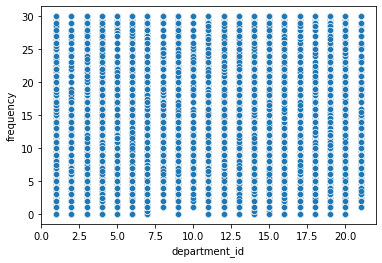

In [24]:
sns.scatterplot(x = 'department_id', y = 'frequency', data = df_1)

In [25]:
df_1.shape


(4472245, 34)

In [33]:
# Crosstab for department name and for part of the day visualization
dept_name_part_day = pd.crosstab(df_1['department'], df_1['order_dow'], dropna = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

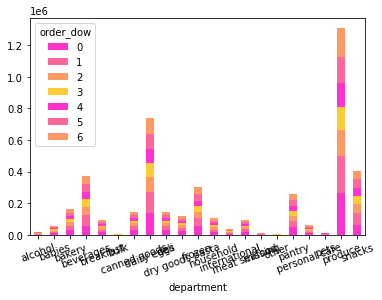

In [34]:
bar_dept_name_part_day = dept_name_part_day.plot.bar(stacked = True, color = sns.color_palette('spring', 4))
plt.legend(title = 'order_dow',loc='upper left')
plt.xticks(rotation= 20, horizontalalignment="center")

In [44]:
# Crosstab for department name and weekday visualization
dept_name_weekday = pd.crosstab(df_1['department_id'], df_1['order_dow'], dropna = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21')])

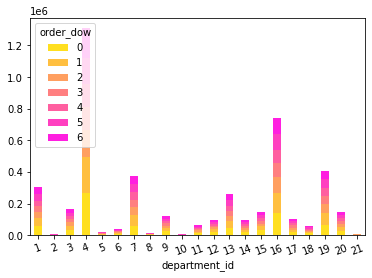

In [45]:
bar_dept_name_weekday = dept_name_weekday.plot.bar(stacked = True, color  = sns.color_palette('spring_r', 7))
plt.legend(title = 'order_dow',loc='upper left')
plt.xticks(rotation= 20, horizontalalignment="center")

In [46]:
path = r"C:\Users\ms207\Desktop\CF\4\19012022 Instacart Basket Analysis\04 Analysis\Visualizations"

In [47]:
bar_dept_name_weekday.figure.savefig(os.path.join(path,'dept_name_weekday.png'))

In [52]:
df_1['loyalty_flag'].value_counts()


Regular customer    2172030
Loyal customer      1435387
New customer         864828
Name: loyalty_flag, dtype: int64

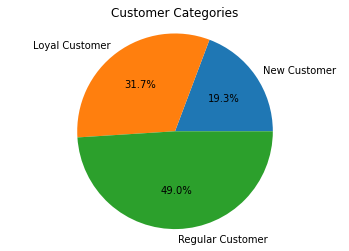

In [53]:
# Pie chart to show the percentages of the customer

labels = 'New Customer', 'Loyal Customer', 'Regular Customer'
sizes = [6249398, 10293737, 15891077]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Customer Categories')

plt.show()

In [54]:
#Export chart

ax1.figure.savefig(os.path.join(path, 'pie_loyalty.png'))

In [60]:
# Region and loyalty

crosstab_region_loyalty = pd.crosstab(df_2['region'], df_2['loyalty_flag'], dropna = False)

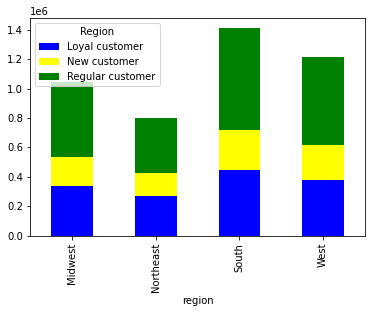

In [62]:
# Create stacked bar chart

bar_region_loyalty = crosstab_region_loyalty.plot.bar(stacked = True, color = ['blue', 'yellow', 'green'])
plt.legend(title = 'Region')

In [63]:
# Export the chart

bar_region_loyalty.figure.savefig(os.path.join(path, 'bar_region_loyalty.png'))

In [65]:
# Region and Family Status

crosstab_region_Fam_status = pd.crosstab(df_2['region'], df_2['fam_status'], dropna = False)

In [66]:
crosstab_region_Fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,93596,52534,719108,179839
Northeast,82005,35475,554409,129678
South,112345,78143,1001361,217503
West,103322,65137,855795,191995


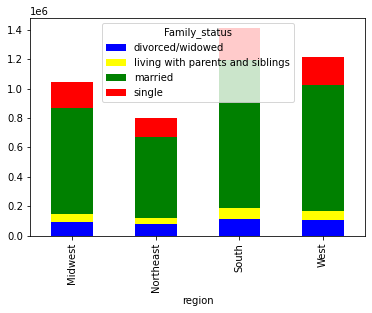

In [67]:
# Create Stacked Bar Chart

bar_region_famstatus = crosstab_region_Fam_status.plot.bar(stacked = True, color = ['blue', 'yellow', 'green', 'red'])
plt.legend(title = 'Family_status')

In [68]:
# Export chart

bar_region_famstatus.figure.savefig(os.path.join(path,'bar_region_famstatus.png'))

In [70]:
# Look at Frequency Flag and products

crosstab_freq_dept = pd.crosstab(df_2['department'], df_2['frequency_flag'], dropna = False)


In [71]:
crosstab_freq_dept

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,12827,2427,4666
babies,41962,4392,9891
bakery,108747,17509,36480
beverages,247838,42106,82862
breakfast,63641,11377,22161
bulk,3508,445,940
canned goods,92978,19254,35648
dairy eggs,501560,79037,160732
deli,95119,17101,33994


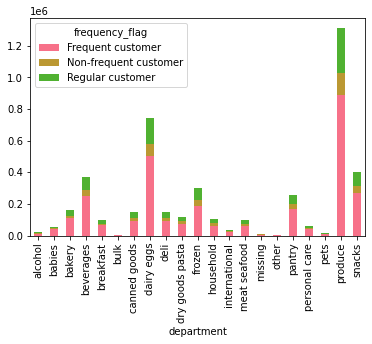

In [72]:
# Create stacked bar chart

bar_freq_dept = crosstab_freq_dept.plot.bar(stacked = True, color = sns.color_palette('husl'))
plt.legend(title = 'frequency_flag')

In [73]:
# Export

bar_freq_dept.figure.savefig(os.path.join(path, 'bar_freq_dept.png'))

In [75]:
df_2['frequency_flag'].value_counts()

Frequent customer        2964458
Regular customer         1002110
Non-frequent customer     505677
Name: frequency_flag, dtype: int64

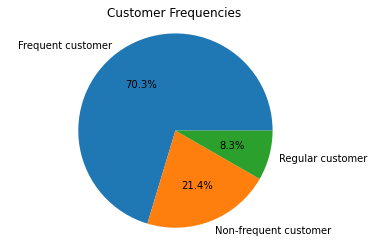

In [76]:
# Frequent Customers

labels = 'Frequent customer', 'Non-frequent customer', 'Regular customer'
sizes = [22813973, 6930252, 2689987]

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%')
ax2.axis('equal')
ax2.set_title('Customer Frequencies')

plt.show()

In [77]:
# Export

ax2.figure.savefig(os.path.join(path, 'pie_cust_freq.png'))

In [79]:
df_2['region'].value_counts()

South        1409352
West         1216249
Midwest      1045077
Northeast     801567
Name: region, dtype: int64

In [81]:
# Look at Region and Orders Hour of Day

crosstab_region_hours = pd.crosstab(df_2['order_hour_of_day'], df_2['region'], dropna = False)

In [82]:
crosstab_region_hours

region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,6760,4725,8368,8129
1,3568,2612,4891,3755
2,2188,1714,2766,2160
3,1541,1414,2161,1563
4,2157,1284,2299,1959
5,2771,2493,3946,3179
6,9511,6975,12635,10834
7,28501,23462,40406,32146
8,53363,44359,75332,64439


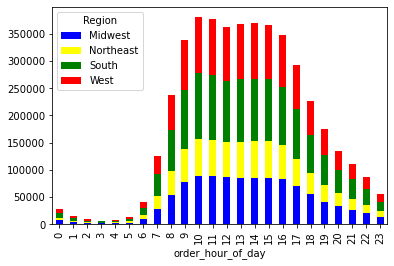

In [83]:
# Create Stacked Bar

bar_region_hour = crosstab_region_hours.plot.bar(stacked = True, color = ['blue', 'yellow', 'green', 'red'])
plt.legend(title = 'Region')

In [84]:
# Export chart

bar_region_hour.figure.savefig(os.path.join(path,'bar_region_hour.png'))

In [86]:
# Region and weekday

crosstab_region_weekday = pd.crosstab(df_2['weekday'], df_2['region'], dropna = False)

In [87]:
crosstab_region_weekday

region,Midwest,Northeast,South,West
weekday,,,,
Friday,148967,111188,198697,167193
Monday,136515,103010,181426,159712
Saturday,192840,153966,267204,229800
Sunday,181536,137033,240517,215502
Thursday,136861,107457,184968,158016
Tuesday,125953,94381,171840,142311
Wednesday,122405,94532,164700,143715


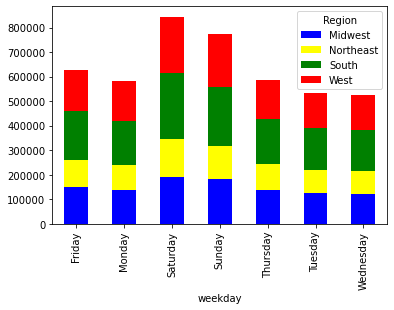

In [88]:
# Create Stacked bar chart

bar_region_weekday = crosstab_region_weekday.plot.bar(stacked = True, color = ['blue', 'yellow', 'green', 'red'])
plt.legend(title = 'Region')

In [89]:
# Export the chart

bar_region_weekday.figure.savefig(os.path.join(path, 'bar_region_weekday.png'))

In [90]:
# Department and Region

crosstab_dept_region = pd.crosstab(df_2['department'], df_2['region'], dropna = False)

In [91]:
crosstab_dept_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,4610,2956,6159,6195
babies,12586,11032,18655,13972
bakery,38127,30424,49995,44190
beverages,87405,68477,115936,100988
breakfast,23101,17958,30446,25674
bulk,1227,737,1515,1414
canned goods,33968,26666,46556,40690
dairy eggs,172277,132806,235392,200854
deli,33480,27098,46004,39632


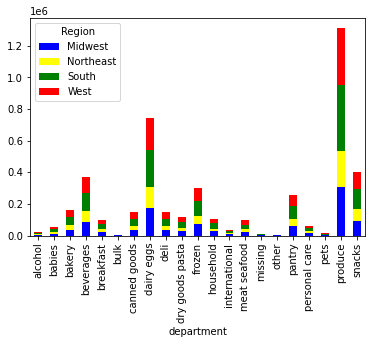

In [92]:
# Create stacked bar chart

bar_dept_region = crosstab_dept_region.plot.bar(stacked = True, color = ['blue', 'yellow', 'green', 'red'])
plt.legend(title = 'Region')

In [93]:
# Age and family Status

crosstab_age_famstat = pd.crosstab(df_2['age_group'], df_2['fam_status'], dropna = False)

In [94]:
crosstab_age_famstat

fam_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
18-20,0,180514,0,46433
21-30,0,50775,475073,172255
31-40,0,0,530238,172058
41-50,0,0,508634,176077
51-60,16485,0,541137,152192
61-70,179653,0,512633,0
71-80,170610,0,515709,0
80+,24520,0,47249,0


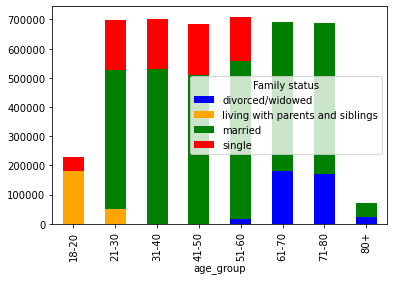

In [95]:
# Stacked bar for age and family status

bar_age_famstat = crosstab_age_famstat.plot.bar(stacked = True, color = ['blue', 'orange', 'green', 'red', 'orange', 'brown', 'pink', 'purple'])
plt.legend(title = 'Family status')

In [96]:
#  Export the stacked bar chart

bar_age_famstat.figure.savefig(os.path.join(path, 'bar_age_famstat.png'))

In [98]:
# age and department

crosstab_age_dept = pd.crosstab(df_2['department'], df_2['age_group'], dropna = False)

In [99]:
crosstab_age_dept

age_group,18-20,21-30,31-40,41-50,51-60,61-70,71-80,80+
department,,,,,,,,
alcohol,1522,3010,3106,2961,3506,2306,3241,268
babies,3898,8611,7880,9782,9482,8047,7401,1144
bakery,8035,25412,25857,25304,24872,24798,26078,2380
beverages,17623,57786,57016,58470,59323,58284,58241,6063
breakfast,4999,14655,15719,14991,15675,14728,15053,1359
bulk,252,815,789,713,737,689,801,97
canned goods,7410,23557,22705,22481,23562,22652,23105,2408
dairy eggs,38949,115977,117623,111297,117590,115242,113000,11651
deli,6893,22815,23226,22175,22636,23195,22998,2276


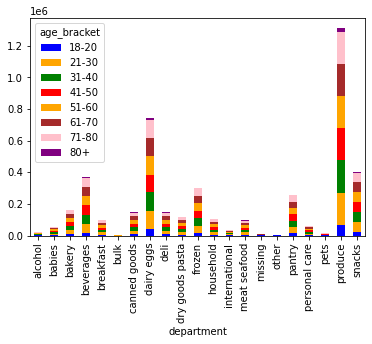

In [100]:
# Stacked bar for age and department

bar_age_dep = crosstab_age_dept.plot.bar(stacked = True, color = ['blue', 'orange', 'green', 'red', 'orange', 'brown', 'pink', 'purple'])
plt.legend(title = 'age_bracket')

In [101]:
# Export chart

bar_age_dep.figure.savefig(os.path.join(path, 'bar_age_dept.png'))

In [102]:
# Parental status and region

crosstab_parstat_region = pd.crosstab(df_2['parental_status'], df_2['region'], dropna = False)

In [103]:
crosstab_parstat_region

region,Midwest,Northeast,South,West
parental_status,,,,
non parent,273435,211683,329848,295317
parent,771642,589884,1079504,920932


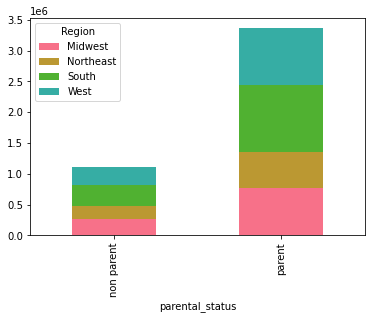

In [104]:
# Create stacked bar

bar_parstat_region = crosstab_parstat_region.plot.bar(stacked = True, color = sns.color_palette('husl'))
plt.legend(title = 'Region')

In [110]:
df_2['age_group'].value_counts().sort_index()

18-20    226947
21-30    698103
31-40    702296
41-50    684711
51-60    709814
61-70    692286
71-80    686319
80+       71769
Name: age_group, dtype: int64

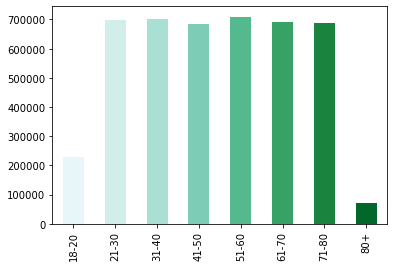

In [112]:
# Create a bar chart for age_bracket column

bar_age_bracket = df_2['age_group'].value_counts().sort_index().plot.bar(color = sns.color_palette('BuGn', 8))

In [113]:
#Check the "Income_Range" column

df_2['income_range'].value_counts().sort_index()

025000-040000     243767
040000-080000    1396686
080000-120000    1528371
120000-160000     997519
160000-210000     271014
210000-523000      33218
523000+             1670
Name: income_range, dtype: int64

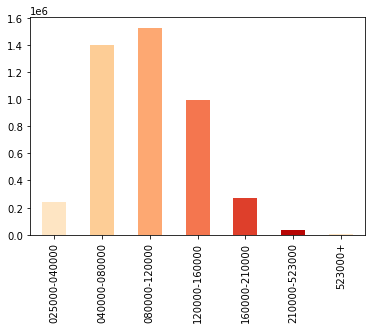

In [114]:
# Create bar chart for Income ranges

bar_income_range = df_2['income_range'].value_counts().sort_index().plot.bar(color = sns.color_palette('OrRd', 6))